# D-Frame double plate joints

Bay: internal

Joint: top and bottom plates

Column removed: 3

Description: additional bottom plate incorporated

|Colour coding|
|:-:|
|blue - cbp|
|green - lnk|
|blredue - jel|

|Undeformed shape, centroidal lines|
|:-:|
|![image](images/01.png)|

|Deformed shape, centroidal lines|
|:-:|
|![image](images/02.png)|

|Undeformed shape, quadrilaterals|
|:-:|
|![image](images/03.png)|

|Deformed shape, quadrilaterals|
|:-:|
|![image](images/04.png)|

In [1]:
import numpy as np
import pandas as pd
import pickle
import sys
sys.path.insert(1, '../../modules')
import common
import materials as mat
import sections as sect
import restraints as restr
import joints
import postproc
from adaptic import adaptic as adaptic

In [2]:
# =============================================================================
# INPUT
# =============================================================================

file = ["2plt3col"]
Response2K_path = "../../assets/Response2K/Response2K_sect2.csv"
load_pkl = True

# num file cut off by LF
num_cutoff = [130]

In [3]:
# =============================================================================
# Load the model
# =============================================================================

#pickle
if load_pkl:
    with open(file[0]+'.pkl', "rb") as f:
        model = (pickle.load(f))
    print('Loaded pickle: '+file[0]+'.pkl')
    material_lst,section_lst,group_lst,nodes,non_st_nodes,restraints,elm_cbp,elm_jel,lnk_lst,load = model
    
# num file
model = []
for i in range(len(file)):
    model.append(adaptic.readFile(file[i],num_cutoff[i]))
           
if Response2K_path != "":
    Response2K=[]
    with open(Response2K_path) as f:
        data2 = f.readlines()[10:] 
        for data in data2:
            Response2K.append(data.split(","))
Response2K=np.array(Response2K).astype(np.float)

Loaded pickle: 2plt3col.pkl


## Postprocessing

First static and pseudo-static curves are determined.

Different components of the system can determine the overall failure of the model. Therefore, the most critical parts are investigeted: joint working in sagging (joint 2), joint working in hogging (joint 1) and beam reinforcement in hogging.

Next, overall forces at the supports are presented.

### 1. Pseudo-static curve

The resistance is governed by the rupture of the bottom plate in joint 2. This occurs at the displacement 141 mm and load factor 0.44.

 pseudo-static curve: failure occurs at X = 141, Y = 0.44255978569013277


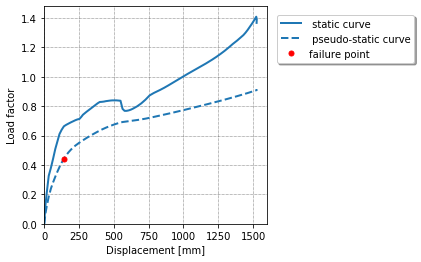

In [21]:
# Static and pseudo-static curves
methodY = ["LF", "pseudo"]
methodX = ["nodeDispMax","nodeDispMax"]
#methodX = ["nodeDispY","nodeDispY"]
#methodXID = common.df_value(nodes,'beam node 82','ID','name')
axis = ["Displacement [mm]", "Load factor"]
legendLbl = [" static curve", " pseudo-static curve"]
legendPos = [1.35, 0.85]
title = ""
scale = [-1, 1] # methodX, methodY
limits = [[0, None],[0, None]]
ptLbl = "failure point"
closestX = 141
postproc.plotting(model, methodX, methodY, axis, title, legendLbl, legendPos, scale, limits,
                  closestX=closestX, ptLbl = ptLbl, lblsOn = True)

In [5]:
# Maximum load factor
print('Maximum load factor for static analysis: {0:.2f}'.format(np.amax(np.array(model[0].LF))))
print('Maximum load factor for pseudo-static analysis: {0:.2f}'.format(np.amax(np.array(model[0].pseudo))))

Maximum load factor for static analysis: 1.41
Maximum load factor for pseudo-static analysis: 0.91


## Joint 2

Joint 2 works in sagging. The failure of this joint occurs at the displacement 141 mm and load factor 0.44. It is the first component to fail and hence defines the failure of the whole system.

|Quadrilaterals|Centroidal line|
|:-:|:-:|
|<img src="images/joint2_quad.png" />|<img src="images/joint2_cent.png" />|

### Joint 2, top plate

Maximum tensile strains occur at the bottom of the bottom plate section.

Joint 2, bottom plate, bottom strains: failure occurs at X = 141.509, Y = 0.1


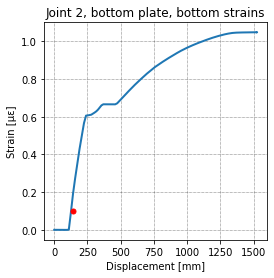

In [6]:
#Plot 4.1 - First Gauss point analysis
methodY = ["gaussStrainT"]
methodX = ["nodeDispMax"]
methodYID = [common.df_value(elm_cbp,"joint 2 cbp bot plt 8","ID","name")+'_1']
#axis = ["Displacement [mm]", "Strain [microstrain]"]
axis = ["Displacement [mm]", "Strain [µε]"]
legendLbl = ["element"]
legendPos = [1.4, 0.85]
title = "Joint 2, bottom plate, bottom strains"
scale = [-1, 1] # methodX, methodY
limits = [[None, None],[None, None]]
additionalPoint = ""
closestY = 0.1
postproc.plotting(model, methodX, methodY, axis, title, legendLbl, legendPos, scale, limits, 
                  methodYID, closestY=closestY)

Joint 2, horizontal (shear) forces on the fasteners: failure occurs at X = 141, Y = 1423.17


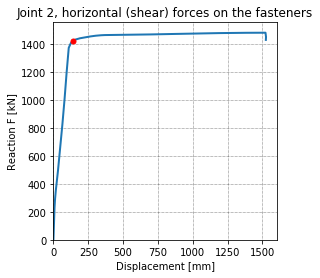

In [38]:
# Jel elements
methodY = ["jelF"]
methodX = ["nodeDispMax"]
methodYID = [common.df_value(elm_jel,'joint 2 jel J12','ID','name')]
axis = ["Displacement [mm]", "Reaction F [kN]"]
legendLbl = ["element"]
title = "Joint 2, horizontal (shear) forces on the fasteners"
scale = [-1, -1E-3] # methodX, methodY
closestX = 141
limits = [[0, None],[0, None]]
postproc.plotting(model, methodX, methodY, axis, title, limits=limits, scale=scale, closestX=closestX, methodYID=methodYID)

Joint 2, vertical (tensile) forces on the fasteners: failure occurs at X = 141, Y = -127.561


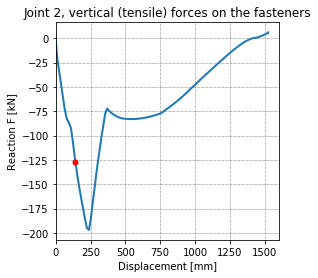

In [37]:
# Jel elements
methodY = ["jelV"]
methodX = ["nodeDispMax"]
methodYID = [common.df_value(elm_jel,'joint 2 jel J12','ID','name')]
axis = ["Displacement [mm]", "Reaction F [kN]"]
legendLbl = ["element"]
title = "Joint 2, vertical (tensile) forces on the fasteners"
scale = [-1, 1E-3] # methodX, methodY
closestX = 141
limits = [[0, None],[None, None]]
postproc.plotting(model, methodX, methodY, axis, title, limits=limits, scale=scale, closestX=closestX, methodYID=methodYID)

## Joint 1

Joint 1 works in hogging. Its failure would occur at the displacement 592 mm and load factor 0.69 if the failure of joint 1 was ignored.

|Quadrilaterals|Centroidal line|
|:-:|:-:|
|<img src="images/joint1_quad.png" />|<img src="images/joint1_cent.png" />|

### Joint 1, top plate

Maximum tensile strains occur at the top of the top plate section.

Joint 1, top plate, top strains: failure occurs at X = 592.073, Y = 0.1


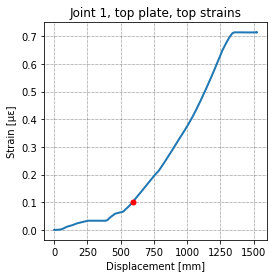

In [8]:
#Plot 4.1 - First Gauss point analysis
methodY = ["gaussStrainB"]
methodX = ["nodeDispMax"]
methodYID = [common.df_value(elm_cbp,"joint 1 cbp top plt 1","ID","name")+'_1']
#axis = ["Displacement [mm]", "Strain [microstrain]"]
axis = ["Displacement [mm]", "Strain [µε]"]
legendLbl = ["element"]
legendPos = [1.4, 0.85]
title = "Joint 1, top plate, top strains"
scale = [-1, 1] # methodX, methodY
limits = [[None, None],[None, None]]
additionalPoint = ""
closestY = 0.1
postproc.plotting(model, methodX, methodY, axis, title, legendLbl, legendPos, scale, limits, 
                  methodYID, closestY = closestY)

### Joint 1, top plate, forces on the anchorage

Joint 1, horizontal (shear) forces on the fasteners: failure occurs at X = 592, Y = 1462.3700000000001


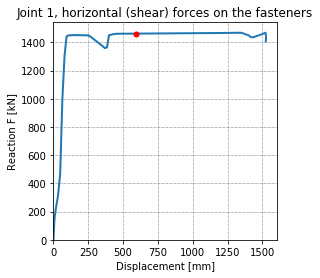

In [9]:
# Jel elements
methodY = ["jelF"]
methodX = ["nodeDispMax"]
methodYID = [common.df_value(elm_jel,'joint 1 jel J6','ID','name')]
axis = ["Displacement [mm]", "Reaction F [kN]"]
legendLbl = ["element"]
title = "Joint 1, horizontal (shear) forces on the fasteners"
scale = [-1, 1E-3] # methodX, methodY
closestX = 592
limits = [[0, None],[0, None]]
postproc.plotting(model, methodX, methodY, axis, title, limits=limits, scale=scale, closestX=closestX, methodYID=methodYID)

Joint 1, vertical (tensile) forces on the fasteners: failure occurs at X = 592, Y = 54.951699999999995


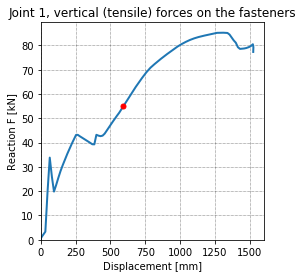

In [10]:
# Jel elements
methodY = ["jelV"]
methodX = ["nodeDispMax"]
methodYID = [common.df_value(elm_jel,'joint 1 jel J6','ID','name')]
axis = ["Displacement [mm]", "Reaction F [kN]"]
legendLbl = ["element"]
title = "Joint 1, vertical (tensile) forces on the fasteners"
scale = [-1, 1E-3] # methodX, methodY
closestX = 592
limits = [[0, None],[0, None]]
postproc.plotting(model, methodX, methodY, axis, title, limits=limits, scale=scale, closestX=closestX, methodYID=methodYID)

 pseudo-static curve: failure occurs at X = 592, Y = 0.6958694860260898


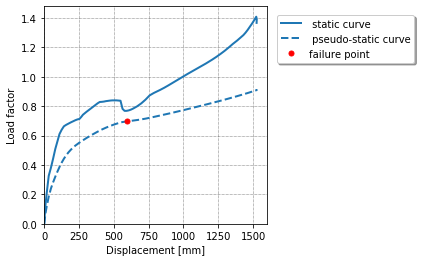

In [39]:
# Static and pseudo-static curves
methodY = ["LF", "pseudo"]
methodX = ["nodeDispMax","nodeDispMax"]
#methodX = ["nodeDispY","nodeDispY"]
#methodXID = common.df_value(nodes,'beam node 82','ID','name')
axis = ["Displacement [mm]", "Load factor"]
legendLbl = [" static curve", " pseudo-static curve"]
legendPos = [1.35, 0.85]
title = ""
scale = [-1, 1] # methodX, methodY
limits = [[0, None],[0, None]]
ptLbl = "failure point"
closestX = 592
postproc.plotting(model, methodX, methodY, axis, title, legendLbl, legendPos, scale, limits,
                  closestX=closestX, ptLbl = ptLbl, lblsOn = True)

## Beam elements

### Beam element near column 2

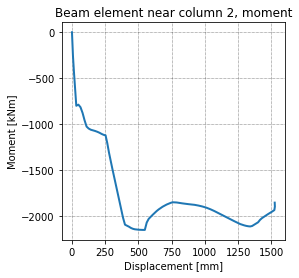

In [11]:
methodY = ["elementM2"]
methodX = ["nodeDispMax"]
methodYID = ["37"]
axis = ["Displacement [mm]", "Moment [kNm]"]
legendLbl = ["element"]
legendPos = [1.3, 0.85]
title = "Beam element near column 2, moment"
scale = [-1, -1E-6] # methodX, methodY
limits = [[None, None],[None, None]]
lblsOn = False
postproc.plotting(model, methodX, methodY, axis, title, legendLbl, legendPos, scale, limits, methodYID, lblsOn = lblsOn) 

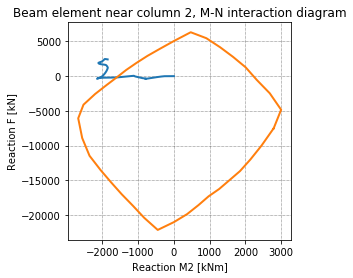

In [12]:
# MN curve
methodX = ["elementM2"]
methodY = ["elementF"]
methodYID = ["37"]
axis = ["Reaction M2 [kNm]", "Reaction F [kN]"]
legendLbl = ["element"]
legendPos = [1.3, 0.85]
title = "Beam element near column 2, M-N interaction diagram"
scale = [-1E-6, 1E-3] # methodX, methodY
limits = [[None, None],[None, None]]
postproc.plotting(model, methodX, methodY, axis, title, legendLbl, legendPos, scale, limits, methodYID, Resp2K = Response2K)

## Restraints

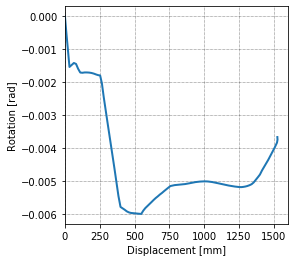

In [13]:
# Node displacements
methodY = ["nodeDispRZ"]
methodX = ["nodeDispMax"]
methodYID = [common.df_value(nodes,'beam node support 2','ID','name')]
axis = ["Displacement [mm]", "Rotation [rad]"]
legendLbl = [" static curve", " pseudo-static curve"]
legendPos = [1.3, 0.85]
title = ""
scale = [-1, 1] # methodX, methodY
limits = [[0, None],[None, None]]
additionalPoint = ""
lblsOn = False
postproc.plotting(model, methodX, methodY, axis, title, legendLbl, legendPos, scale, limits,methodYID, lblsOn = lblsOn)

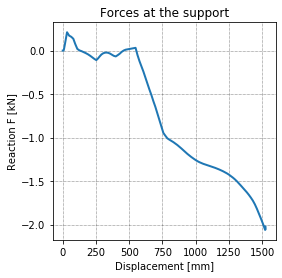

In [14]:
# Jel elements
methodY = ["jelF"]
methodX = ["nodeDispMax"]
methodYID = [common.df_value(elm_jel,'jel support 2','ID','name')]
axis = ["Displacement [mm]", "Reaction F [kN]"]
legendLbl = ["element"]
legendPos = [1.3, 0.85]
title = "Forces at the support"
scale = [-1, 1E-6] # methodX, methodY
limits = [[None, None],[None, None]]
additionalPoint = ""
postproc.plotting(model, methodX, methodY, axis, title, legendLbl, legendPos, scale, limits, methodYID,additionalPoint)

In [15]:
common.df_value(elm_jel,'jel support 2','ID','name')

'502'

In [16]:
common.df_value(nodes,'beam node support 2','ID','name')

'37'

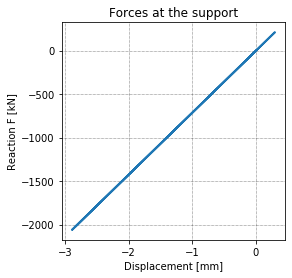

In [17]:
# Jel elements
methodY = ["jelF"]
methodX = ["nodeDispX"]
methodXID = common.df_value(nodes,'beam node support 2','ID','name')
methodYID = [common.df_value(elm_jel,'jel support 2','ID','name')]
axis = ["Displacement [mm]", "Reaction F [kN]"]
legendLbl = ["element"]
legendPos = [1.3, 0.85]
title = "Forces at the support"
scale = [-1, 1E-3] # methodX, methodY
limits = [[None, None],[None, None]]
additionalPoint = ""
postproc.plotting(model, methodX, methodY, axis, title, legendLbl, legendPos, scale, limits, 
                  methodYID=methodYID,methodXID=methodXID)

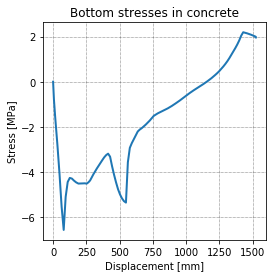

In [18]:
#Plot 4.1 - First Gauss point analysis
methodY = ["gaussStressT"]
methodX = ["nodeDispMax"]
methodYID = ["109_2"]
#axis = ["Displacement [mm]", "Strain [microstrain]"]
axis = ["Displacement [mm]", "Stress [MPa]"]
legendLbl = ["element"]
legenAlt=["element 1","element 2"]
legendPos = [1.4, 0.85]
title = "Bottom stresses in concrete"
scale = [-1, 1] # methodX, methodY
limits = [[None, None],[None, None]]
additionalPoint = ""
postproc.plotting(model, methodX, methodY, axis, title, legendLbl, legendPos, scale, limits, methodYID, legenAlt=legenAlt)

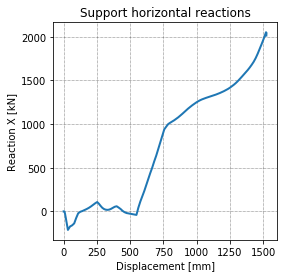

In [19]:
# Restrained or displaced freedoms
methodY = ["restrainedX"]
methodX = ["nodeDispMax"]
methodYID = ["302"]
axis = ["Displacement [mm]", "Reaction X [kN]"]
legendLbl = ["element"]
legendPos = [1.3, 0.85]
title = "Support horizontal reactions"
scale = [-1, -1E-3] # methodX, methodY
limits = [[None, None],[None, None]]
postproc.plotting(model, methodX, methodY, axis, title, legendLbl, legendPos, scale, limits, methodYID) 

In [20]:
# LNK elements
methodY = ["lnk2M1"]
methodX = ["nodeDispMax"]
methodYID = ["501","502"]
axis = ["Displacement [mm]", "Reaction M1 [kNm]"]
legendLbl = ["element"]
legendPos = [1.50, 0.85]
title = "Link elements"
scale = [-1, 1E-6] # methodX, methodY
limits = [[None, None],[None, None]]
#postproc.plotting(model, methodX, methodY, axis, title, legendLbl, legendPos, scale, limits, methodYID) 